In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=263a685117ff6e5b664bb5f97d781fd2fbaa3192e08810d3367f24fd359a1842
  Stored in directory: c:\users\91810\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=951b8d316eef2c070d47c0ce880d44666dd7ba0897eab3ba81f2ef7bfb46b93f
  Stored in directory: c:\users\91810\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [2]:
import yfinance as yf
import pandas as pd

In [3]:
apple = yf.Ticker("AAPL")

In [4]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [5]:
apple_info['country']

'United States'

In [6]:
apple_share_price_data = apple.history(period="max")

In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


In [8]:
apple_share_price_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

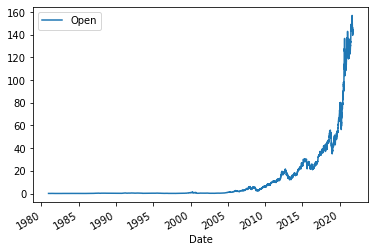

In [9]:
apple_share_price_data.plot(x="Date", y="Open")

In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
Name: Dividends, Length: 72, dtype: float64

<AxesSubplot:xlabel='Date'>

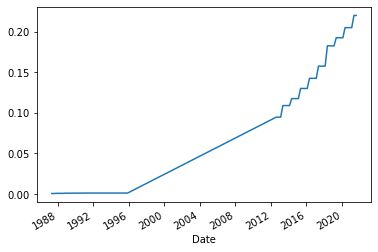

In [11]:
apple.dividends.plot()

In [14]:
amd = yf.Ticker('AMD')
amdinfo = amd.info

In [16]:
amdinfo['country']

'United States'

In [17]:
amdinfo['sector']

'Technology'

In [22]:
stockdata = amd.history(period="max")
stockdata


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2021-10-11,104.620003,107.199997,104.019997,104.680000,31284400,0,0.0
2021-10-12,105.169998,106.040001,104.339996,105.040001,34039900,0,0.0
2021-10-13,106.279999,109.879997,106.250000,109.160004,55631900,0,0.0


In [23]:
stockdata['Volume'][0]

219600

### Extracting Stock data using web scraping

In [26]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [29]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data = requests.get(url).text

In [30]:
soup = bs(data,'html5lib')

In [33]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [34]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [35]:
# We can also use the pandas read_html function using the url
read_html_pandas_data = pd.read_html(url)

In [36]:
#Or we can convert the BeautifulSoup object to a string
read_html_pandas_data = pd.read_html(str(soup))

In [37]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [51]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
html_data = requests.get(url).text

In [52]:
soupp = bs(html_data,'html5lib')

In [60]:
#soupp.head()
soupp.find('title')

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

In [82]:
pandas_data1 = pd.read_html(str(soupp))


In [83]:
pandas_data1[0]

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jan 01, 2021",3270.00,3363.89,3086.00,3206.20,3206.20,71528900
1,"Dec 01, 2020",3188.50,3350.65,3072.82,3256.93,3256.93,77556200
2,"Nov 01, 2020",3061.74,3366.80,2950.12,3168.04,3168.04,90810500
3,"Oct 01, 2020",3208.00,3496.24,3019.00,3036.15,3036.15,116226100
4,"Sep 01, 2020",3489.58,3552.25,2871.00,3148.73,3148.73,115899300
...,...,...,...,...,...,...,...
57,"Apr 01, 2016",590.49,669.98,585.25,659.59,659.59,78464200
58,"Mar 01, 2016",556.29,603.24,538.58,593.64,593.64,94009500
59,"Feb 01, 2016",578.15,581.80,474.00,552.52,552.52,124144800
60,"Jan 01, 2016",656.29,657.72,547.18,587.00,587.00,130200900


In [62]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0]
    Open = col[1]
    high = col[2]
    low = col[3]
    close = col[4]
    adj_close = col[5]
    volume = col[6]
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [81]:
amazon_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,"[[Jun 01, 2021]]",[[504.01]],[[536.13]],[[482.14]],[[528.21]],"[[78,560,600]]",[[528.21]]
1,"[[May 01, 2021]]",[[512.65]],[[518.95]],[[478.54]],[[502.81]],"[[66,927,600]]",[[502.81]]
2,"[[Apr 01, 2021]]",[[529.93]],[[563.56]],[[499.00]],[[513.47]],"[[111,573,300]]",[[513.47]]
3,"[[Mar 01, 2021]]",[[545.57]],[[556.99]],[[492.85]],[[521.66]],"[[90,183,900]]",[[521.66]]
4,"[[Feb 01, 2021]]",[[536.79]],[[566.65]],[[518.28]],[[538.85]],"[[61,902,300]]",[[538.85]]
...,...,...,...,...,...,...,...
65,"[[Jan 01, 2016]]",[[109.00]],[[122.18]],[[90.11]],[[91.84]],"[[488,193,200]]",[[91.84]]
66,"[[Dec 01, 2015]]",[[124.47]],[[133.27]],[[113.85]],[[114.38]],"[[319,939,200]]",[[114.38]]
67,"[[Nov 01, 2015]]",[[109.20]],[[126.60]],[[101.86]],[[123.33]],"[[320,321,800]]",[[123.33]]
68,"[[Oct 01, 2015]]",[[102.91]],[[115.83]],[[96.26]],[[108.38]],"[[446,204,400]]",[[108.38]]


In [64]:
amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [65]:
type(amazon_data)

pandas.core.frame.DataFrame

In [77]:
open_data = amazon_data[['Open']]
type(open_data)

pandas.core.frame.DataFrame

In [80]:
open_data.iloc[-1]

Open    [[109.35]]
Name: 69, dtype: object

## FinalAssignment

In [84]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [86]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()